## Observations and Insights 

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Check top of mouse data
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Check start of study results
study_results.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset, join on Mouse ID
combined_data = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice.
print("Total mice: " + str(combined_data["Mouse ID"].nunique()))

Total mice: 249


In [32]:
# Find any mouse ID that has duplicate data for Timepoint
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"]==duplicate_mice[0],:]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_analysis_data = combined_data.loc[combined_data["Mouse ID"]!=duplicate_mice[0],:]
mouse_analysis_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice in the clean DataFrame.
print("Total mice after removal of duplicate data: " + str(mouse_analysis_data["Mouse ID"].nunique()))

Total mice after removal of duplicate data: 248


## Summary Statistics

In [46]:
# List the different treatments
treatment = mouse_analysis_data["Drug Regimen"].unique()
treatment

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [89]:
# Create empty data frame for summary statistics
tumor_summary_statistics = pd.DataFrame({"Drug Regimen": [],
                                        "Mean": [],
                                        "Median": [],
                                        "Variance": [],
                                        "Standard Deviation": [],
                                        "SEM": []})

tumor_summary_statistics

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
for drug in treatment:
    drug_data = mouse_analysis_data.loc[mouse_analysis_data["Drug Regimen"]==drug,["Tumor Volume (mm3)"]]
    mean_info = drug_data["Tumor Volume (mm3)"].mean()
    median_info = drug_data["Tumor Volume (mm3)"].median()
    variance_info = drug_data["Tumor Volume (mm3)"].var()
    std_info = drug_data["Tumor Volume (mm3)"].std()
    sem_info = drug_data["Tumor Volume (mm3)"].sem()
    summary = pd.DataFrame([[drug, mean_info, median_info, variance_info, std_info, sem_info]], 
                            columns=["Drug Regimen", "Mean", "Median", "Variance", "Standard Deviation", "SEM"])
    tumor_summary_statistics = tumor_summary_statistics.append(summary, ignore_index=True)

tumor_summary_statistics



,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [108]:
# Get data need to plot
mouse_treatment_data = mouse_analysis_data[["Mouse ID","Drug Regimen"]]
mouse_treatment_data = mouse_treatment_data.drop_duplicates(keep="first")
drug_counts = mouse_treatment_data["Drug Regimen"].value_counts()
drug_counts

Ketapril     25
Naftisol     25
Ramicane     25
Placebo      25
Zoniferol    25
Capomulin    25
Ceftamin     25
Infubinol    25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

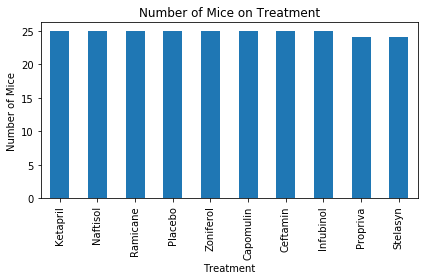

In [109]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

pd_mouse_treatment = drug_counts.plot(kind="bar", title="Number of Mice on Treatment")
pd_mouse_treatment.set_xlabel("Treatment")
pd_mouse_treatment.set_ylabel("Number of Mice")

plt.tight_layout()

In [126]:
# Turn drug counts into data frame
mouse_treatment = pd.DataFrame(drug_counts)
mouse_treatment = mouse_treatment.rename(columns={"Drug Regimen": "Number of Mice"})
mouse_treatment = mouse_treatment.rename_axis("Drug Regimen")
mouse_treatment


,Number of Mice
Drug Regimen,
Ketapril,25
Naftisol,25
Ramicane,25
Placebo,25
Zoniferol,25
Capomulin,25
Ceftamin,25
Infubinol,25
Propriva,24


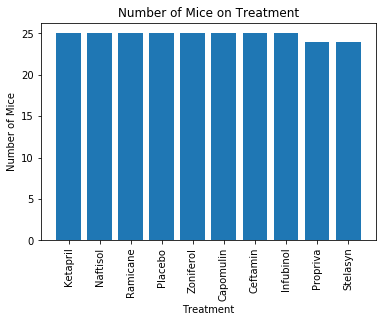

In [135]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(mouse_treatment.index,mouse_treatment["Number of Mice"])

# Add labels
plt.title("Number of Mice on Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")

# Alter ticks
x_axis = np.arange(len(mouse_treatment["Number of Mice"]))
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, mouse_treatment.index, rotation=90)

plt.show()


In [140]:
# Get data needed to plot

mouse_sex = mouse_analysis_data[["Mouse ID","Sex"]]
mouse_sex = mouse_sex.drop_duplicates(keep="first")
sex_counts = mouse_sex["Sex"].value_counts()
sex_counts

Male      125
Female    123
Name: Sex, dtype: int64

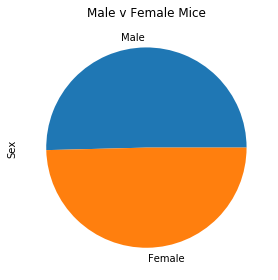

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts.plot(kind="pie", title="Male v Female Mice")

plt.tight_layout()


In [142]:
# Turn sex counts into data frame
mouse_sex_data = pd.DataFrame(sex_counts)
mouse_sex_data = mouse_sex_data.rename(columns={"Sex": "Number of Mice"})
mouse_sex_data = mouse_sex_data.rename_axis("Sex")
mouse_sex_data

,Number of Mice
Sex,
Male,125
Female,123


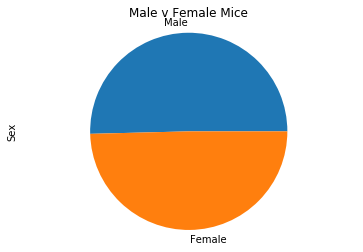

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_sex_data["Number of Mice"], labels=mouse_sex_data.index)

# Add labels
plt.title("Male v Female Mice")

plt.axis("equal")
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Group by Mouse ID then get max on timepoint?

grouped_data = mouse_analysis_data.groupby("Mouse ID")
max_timepoint = pd.DataFrame(grouped_data["Timepoint"].max())
max_timepoint = max_timepoint.rename(columns={"Timepoint": "Max Timepoint"})
#max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(mouse_analysis_data, max_timepoint, how='outer', on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
